In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize']=(20,20)
plt.rcParams['figure.dpi']=250
sns.set_theme(style='darkgrid',palette='rainbow')
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
#here min valis 0 for all dependent col, i.e., missing value is available, 0 not nan, na
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
df.iloc[:,:-1]=df.iloc[:,:-1].replace(0,np.nan)

In [6]:
df.isna().sum()

animal name     0
hair           58
feathers       81
eggs           42
milk           60
airborne       77
aquatic        65
predator       45
toothed        40
backbone       18
breathes       21
venomous       93
fins           84
legs           23
tail           26
domestic       88
catsize        57
type            0
dtype: int64

In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,43.0,20.0,59.0,41.0,24.0,36.0,56.0,61.0,83.0,80.0,8.0,17.0,78.000000,75.0,13.0,44.0,101.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.679487,1.0,1.0,1.0,2.831683
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.498862,0.0,0.0,0.0,2.102709
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,2.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,4.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.000000,1.0,1.0,1.0,7.000000


In [8]:
#si=SimpleImputer(strategy='')
df.dtypes

animal name     object
hair           float64
feathers       float64
eggs           float64
milk           float64
airborne       float64
aquatic        float64
predator       float64
toothed        float64
backbone       float64
breathes       float64
venomous       float64
fins           float64
legs           float64
tail           float64
domestic       float64
catsize        float64
type             int64
dtype: object

In [9]:
df.drop(columns="animal name",inplace=True)

In [10]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0,1
1,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0,1
2,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,4
3,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,NaN,NaN,1.0,1
4,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,1.0,NaN,1.0,1
97,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,6
98,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,4.0,1.0,NaN,1.0,1
99,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7


In [11]:
si=SimpleImputer(strategy='mean')
si.fit_transform(df.iloc  [:,:-1])
df.iloc[:,:-1]=si.fit_transform(df.iloc  [:,:-1])

In [12]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [13]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.000000,101.0,101.0,101.0,101.000000
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.679487,1.0,1.0,1.0,2.831683
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.315246,0.0,0.0,0.0,2.102709
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1.000000
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,2.000000
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,4.000000
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.000000,1.0,1.0,1.0,7.000000


In [14]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.679487,1.0,1.0,1.0,4
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.000000,1.0,1.0,1.0,1
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.000000,1.0,1.0,1.0,6
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.000000,1.0,1.0,1.0,1
99,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.679487,1.0,1.0,1.0,7


In [15]:
x=df.iloc [:,:-1]
y=df['type']

In [16]:
sc=StandardScaler()
sc.fit(x)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.2)

In [18]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain), knn.score (xtest,ytest)

(0.625, 0.5238095238095238)

In [19]:
#Training - testing accuracy > 3 so overfitting

In [20]:
trainAcc=[]
testAcc=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    trainAcc.append(knn.score(xtrain,ytrain))
    testAcc.append(knn.score(xtest,ytest))

In [21]:
trainAcc

[0.625,
 0.625,
 0.625,
 0.6,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125,
 0.7125]

In [22]:
testAcc

[0.5238095238095238,
 0.5238095238095238,
 0.5238095238095238,
 0.5238095238095238,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

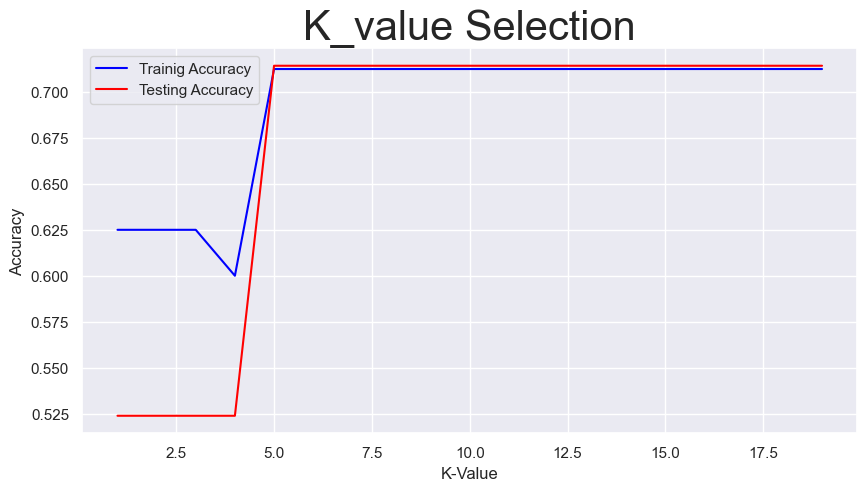

In [23]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=100
plt.plot(range(1,20),trainAcc,color='b',label='Trainig Accuracy')
plt.plot(range(1,20),testAcc,color='r',label='Testing Accuracy')
plt.title('K_value Selection',size=30)
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain), knn.score (xtest,ytest)

(0.7125, 0.7142857142857143)

In [25]:
#Here k-vlaue =5 for training and testing accuracy

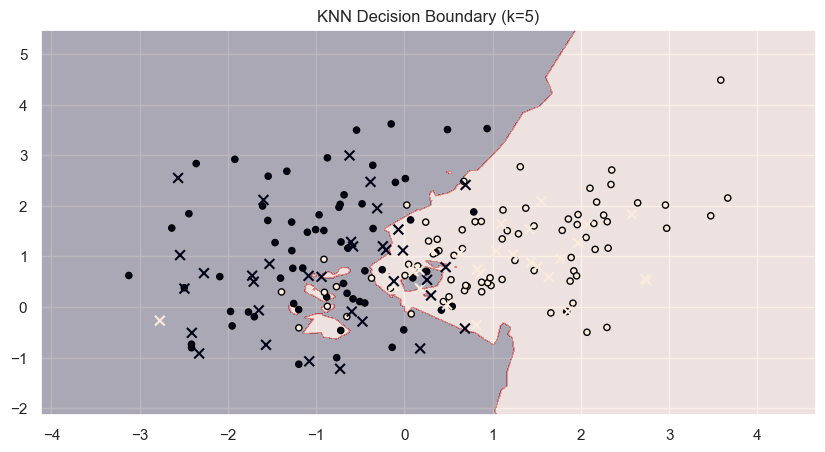

In [28]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_samples=200, random_state=42)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

# Mesh grid
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(xtrain[:, 0], xtrain[:, 1], c=ytrain, edgecolor='k', s=20)
plt.scatter(xtest[:, 0], xtest[:, 1], c=ytest, marker='x', s=50)
plt.title("KNN Decision Boundary (k=5)")
plt.show()


In [ ]:
#1. What are the key hyperparameters in KNN?
#n_neighbors, Distance metric 

#2. What distance metrics can be used in KNN?
#Euclidean Distance